In [1]:
# Import preliminaries
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', edgecolor='lightgray')
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=8)
import itertools, os
from pathlib import Path

# Seasonal Adjustment Tools
os.environ['X13PATH'] = '/home/brian/Documents/econ_data/micro/x13as/'
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis

# bd CPS files
cps_dir = Path('/home/brian/Documents/CPS/data/clean/')

In [16]:
# Get CPS data
cols = ['YEAR', 'MONTH', 'FEMALE', 'AGE', 'NILFREASON', 
        'LFS', 'BASICWGT', 'CPSID', 'LINENO', 'WBHAO', 'DISABILITY']

df = pd.concat([pd.read_feather(cps_dir / f'cps{year}.ft', columns=cols)
                  .query('25 <= AGE <= 54')
                 for year in range(2008, 2024)])

# Date from Year, Month
df['DATE'] = pd.to_datetime(dict(year=df.YEAR, 
                                 month=df.MONTH, day=1))

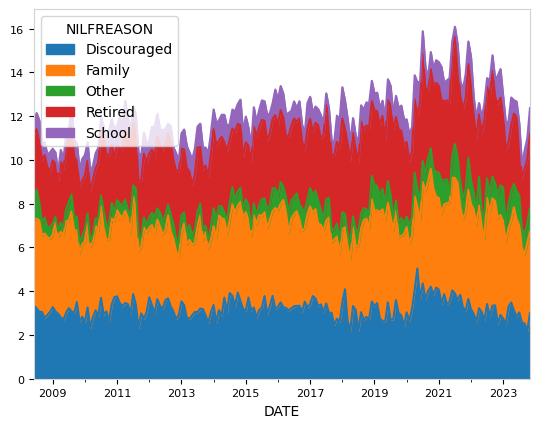

In [20]:
sh = ((df.query('DISABILITY == 1').groupby(['DATE', 'NILFREASON']).BASICWGT.sum() / 
 df.query('DISABILITY == 1').groupby('DATE').BASICWGT.sum()) * 100).unstack()
sh = sh.rename({'nan': 'In Labor Force'}, axis=1)
sh.drop(['In Labor Force', 'Disabled/Ill'], axis=1).plot(kind='area', stacked=True);

In [18]:
sh = sh.rename({'nan': 'In Labor Force'}, axis=1)

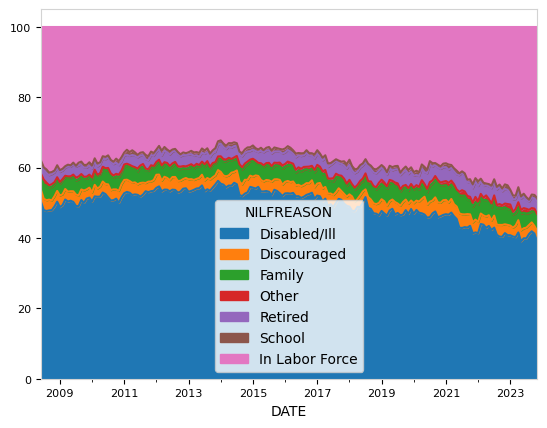

In [19]:
sh.plot(kind='area', stacked=True);